In [1]:
# importacion de las librerias necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [2]:
# Importacion del dataset iris
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Resumen del dataset
print(dataset.shape)

(150, 5)


In [4]:
# Mas información sobre la data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
# Descripciones
print(dataset.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Distribución de clases
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


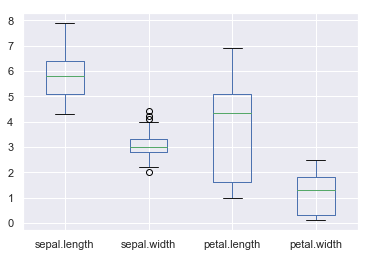

In [7]:
# graficando el dataset
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22c67ba8>,
      dtype=object)

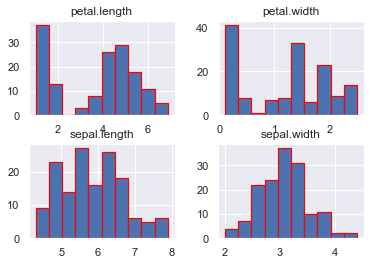

In [8]:
# histogramas
dataset.hist(edgecolor='red', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a232336a0>,
      dtype=object)

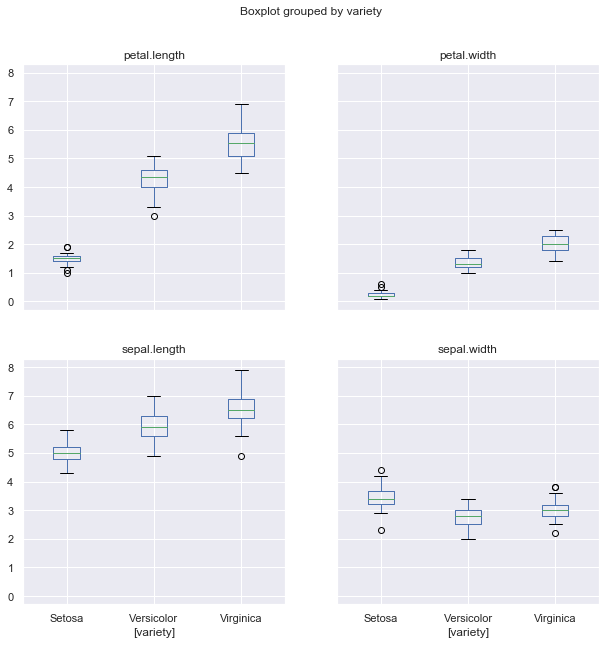

In [9]:
# Grafico de caja por clase
dataset.boxplot(by="variety",figsize=(10,10))

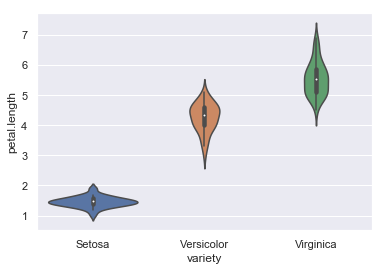

In [10]:
# Grafico de la longitud de petalo para cada especie o clase 
sns.violinplot(data=dataset,x="variety", y="petal.length")

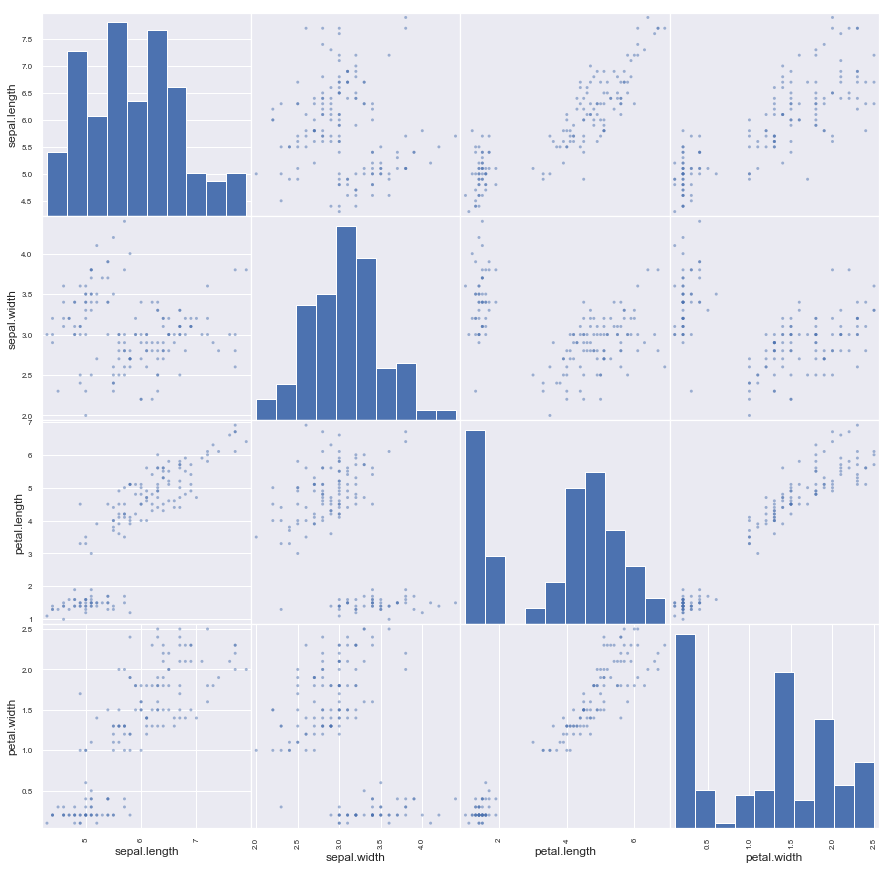

In [11]:
from pandas.plotting import scatter_matrix
# Matriz de diagramas de dispersión
scatter_matrix(dataset,figsize=(15,15))
plt.show()

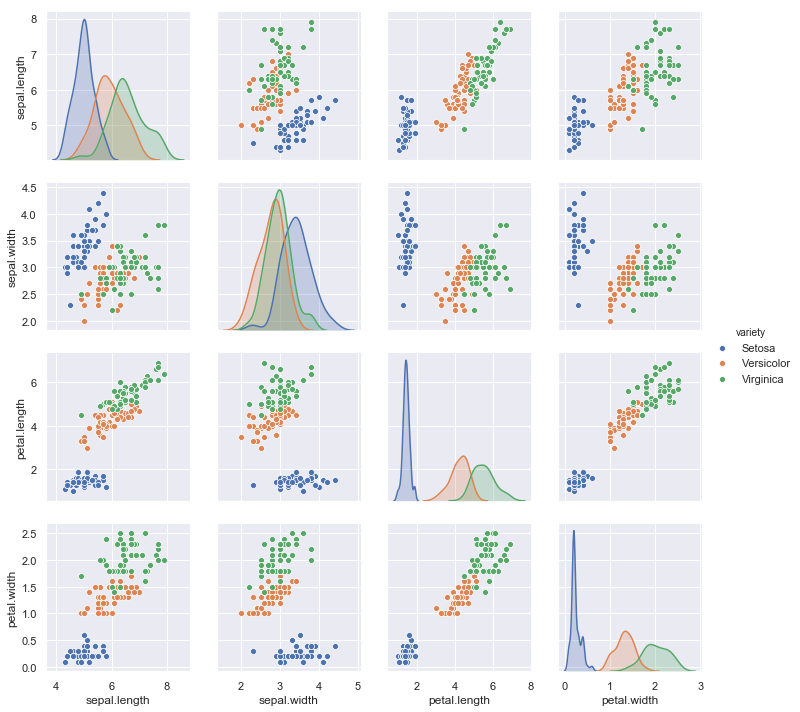

In [12]:
# Uso de la gráfica de par de mar para ver la relación bivariada entre cada par de características
sns.pairplot(dataset, hue="variety")

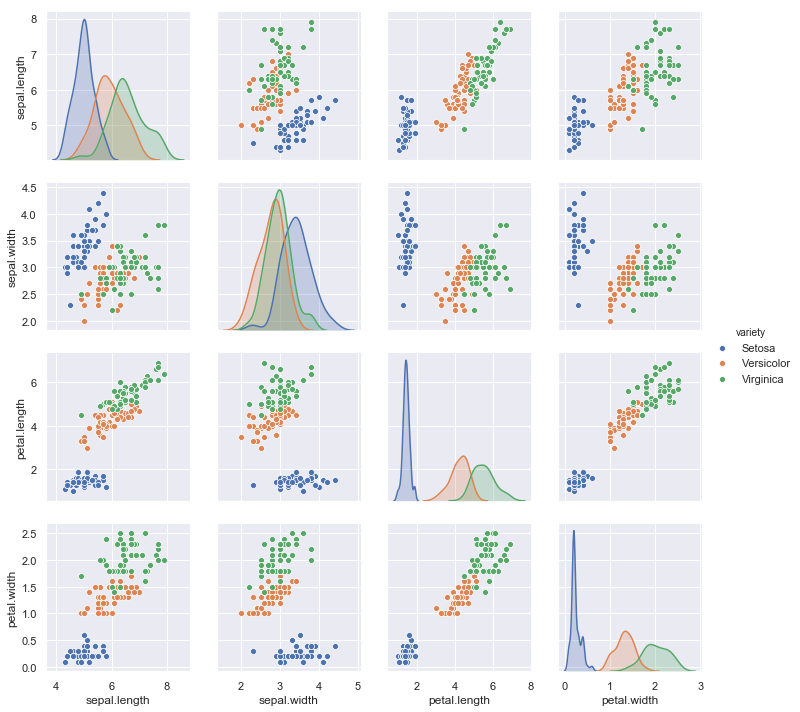

In [13]:
# actualizando los elementos diagonales en un diagrama de par para mostrar un kde
sns.pairplot(dataset, hue="variety",diag_kind="kde")

Applying different Classification models:

In [14]:
# Importando metricas para evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
# Sepearando los datos en variables dependientes e independientes
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Dividiendo el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# Regresión Lineal
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Precisión
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy is 0.9666666666666667


In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Precisión
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.83      0.91         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


In [18]:
# Support Vector Machine's 

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Precisión
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [19]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Precisión
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [20]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Precisión
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0
